# Employment in the HTEC/STEM sector (General Overview)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Importing the Dataset from the Excel file, and the relevant sheet:
df=pd.read_excel("C:\\Users\\ibsi\\Desktop\\STEM-HTEC-Emplyoment-in-the-EU\\Datasets\\Employment in HTEC.xlsx", sheet_name="HTEC(thousands)")
df=df.drop(df.index[0:4]).reset_index(drop = True)
df.head(5)

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,211.2,207.8,213.3,198.4,198.6,198.6,196.7,211.3,230.5,245.1
1,Bulgaria,93.3,90.9,93.8,98.8,97.0,112.8,116.1,114.8,122.6,127.7
2,Czechia,209.4,221.2,215.0,226.9,238.2,229.2,242.0,243.6,261.9,257.7
3,Denmark,144.6,145.6,144.8,145.6,149.5,154.5,154.0,143.5,146.8,157.3
4,Germany,1627.8,1662.2,1687.8,1633.7,1648.4,1627.7,1670.4,1703.7,1738.2,1759.0


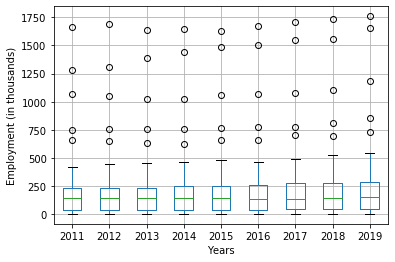

In [12]:
# Boxplot for the years 2011 t0 2019
boxplot = df.boxplot(column=["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"])
plt.xlabel('Years', fontsize=10)
plt.ylabel('Employment (in thousands)', fontsize=10)
plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_1", transparent=True, bbox_inches="tight")

Observations:
* The above box plot shows an almost steady trend of the HTEC emplyoment numbers in the EU countries in the past decade.  
* In 2019, there is a slight increase in the employment as indicated by the median and 75th percentile (Stats summary below).

In [13]:
#Descriptive statistics summary for the year 2019:
df["2019"].describe()

count      35.000000
mean      305.940000
std       433.175797
min         5.700000
25%        50.100000
50%       155.600000
75%       290.850000
max      1759.000000
Name: 2019, dtype: float64

In [14]:
#Calculating the cumulative (total) empyolment per country:
Total=df.sum(axis=1)
df["Cumulative employment"]=Total
df.head(5)

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Cumulative employment
0,Belgium,211.2,207.8,213.3,198.4,198.6,198.6,196.7,211.3,230.5,245.1,1900.3
1,Bulgaria,93.3,90.9,93.8,98.8,97.0,112.8,116.1,114.8,122.6,127.7,974.5
2,Czechia,209.4,221.2,215.0,226.9,238.2,229.2,242.0,243.6,261.9,257.7,2135.7
3,Denmark,144.6,145.6,144.8,145.6,149.5,154.5,154.0,143.5,146.8,157.3,1341.6
4,Germany,1627.8,1662.2,1687.8,1633.7,1648.4,1627.7,1670.4,1703.7,1738.2,1759.0,15131.1


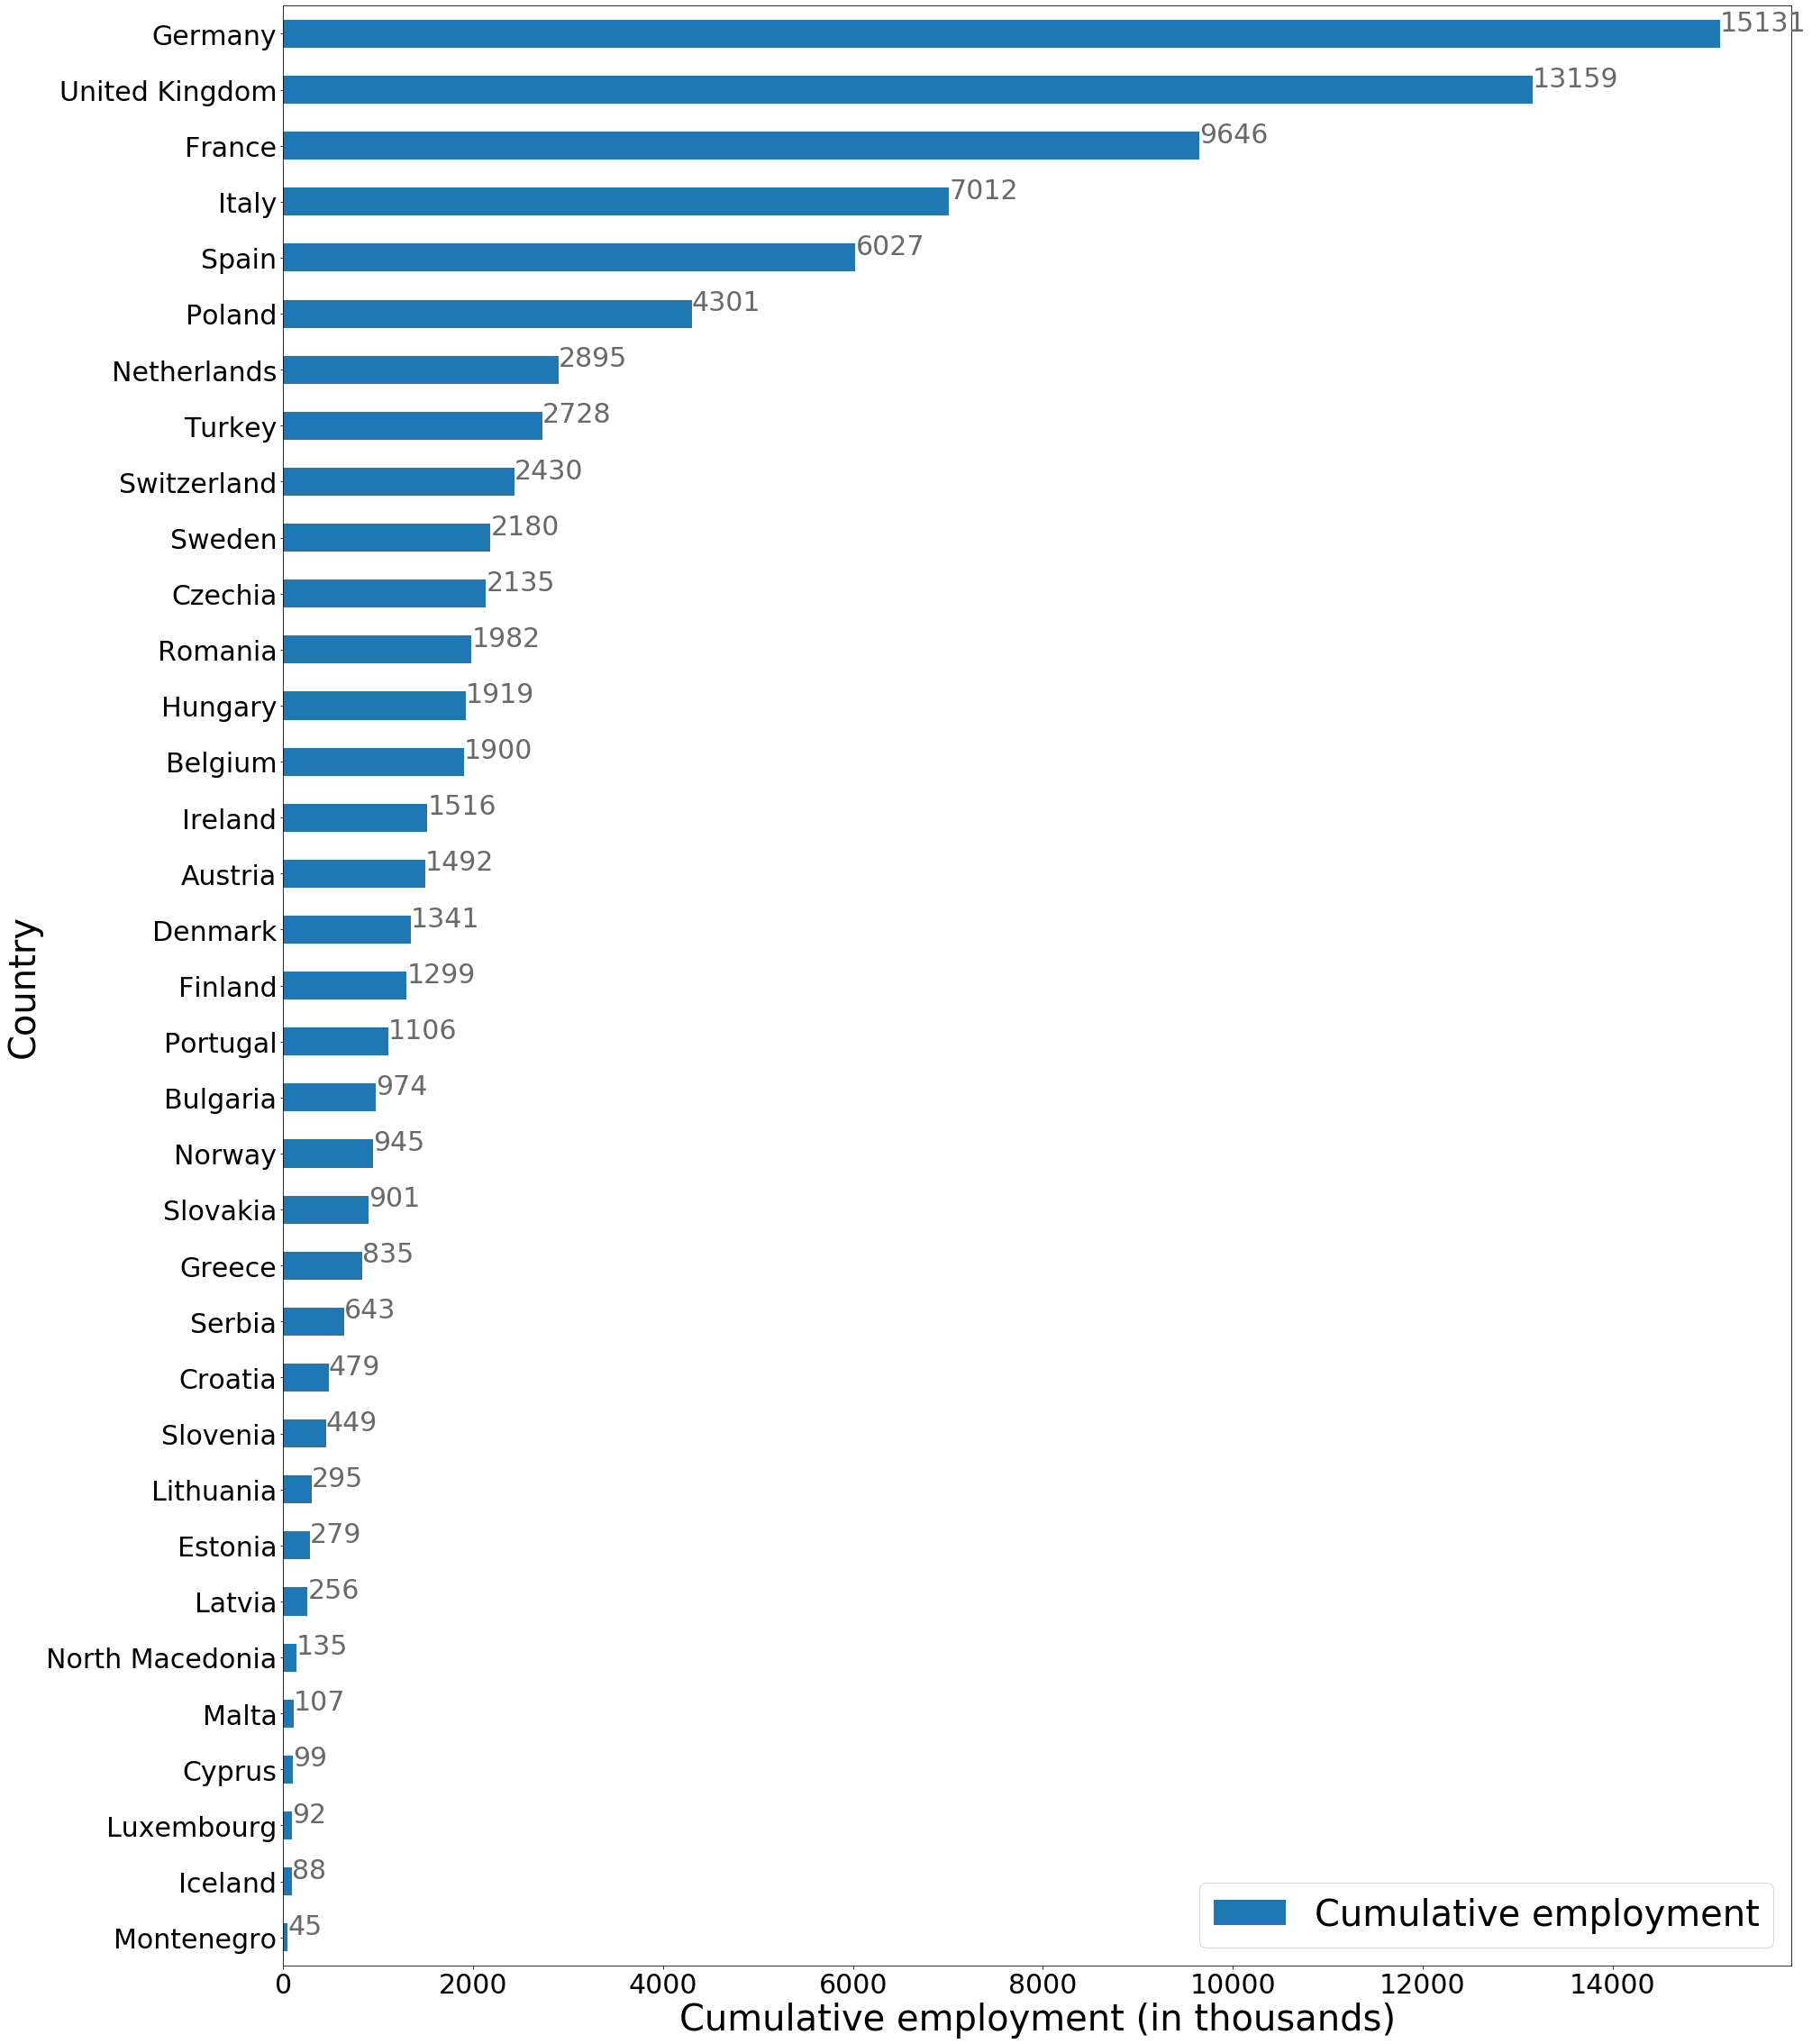

In [18]:
ax=df.sort_values('Cumulative employment', ascending=True).plot.barh(x="Country", y="Cumulative employment", figsize=(30,40))
plt.xlabel('Cumulative employment (in thousands)', fontsize=40)
plt.ylabel('Country', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=4, prop={'size': 40})

for i in ax.patches:
    
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(int((i.get_width()))), fontsize=30, color='dimgrey')
plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_3", transparent=True, bbox_inches="tight")

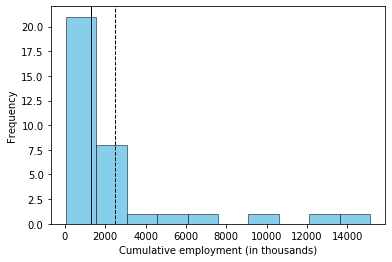

In [16]:
#Plotting a Histogram with the Cumulative employment:
#plt.hist(df["Cumulative employment"], color = 'skyblue', edgecolor = 'black', lw=0.5)
#Plotting a dashed line indicating the mean value:
plt.axvline(df["Cumulative employment"].mean(), color='k', linestyle='dashed', linewidth=1)
#Plotting a solid line indicating the median value:
plt.axvline(df["Cumulative employment"].median(), color='k', linestyle='solid', linewidth=1)
plt.xlabel('Cumulative employment (in thousands)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_2", transparent=True, bbox_inches="tight")

In [17]:
df["Cumulative employment"].describe()

count       35.000000
mean      2480.994286
std       3596.357352
min         45.300000
25%        372.700000
50%       1299.200000
75%       2305.800000
max      15131.100000
Name: Cumulative employment, dtype: float64

Observations:

*The average HTEC cumulative employment in the EU in the period from 2010-2019 reaches ~ 2480000
*Considering the high std value, in this case the median is a more representative statistic
*50% of the countries employed up to 1290000 since 2010.

For further analysis, the countries were selected based on the percentiles (Q1 and Q3).

*The top 4 countries (Cumulative employment > Q3): Germany, UK, Italy, France
*Lowest 2 countries (Q1< Cumulative emplyoment <Q2): Slovenia, Croatia
*Mid 2 countries (Q2< Cumulative employment <Q3): Slovakia, Bulgaria 